# 1. THÔNG TIN NHÓM

5 Thành viên:
- `18120507` Trương Công Phu
- `18120514` Phan Thiên Phúc
- `18120517` Nguyễn Công Bình Phương
- `18120532` Nguyễn Hoàng Sang
- `18120626` Đặng Quang Trường 

# 2. XỬ LÍ DỮ LIỆU

## import module

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")
import geopandas
plt.style.use('bmh')

In [6]:
data = pd.read_csv('2021-04-22.csv')
data.head()

,Unnamed: 0,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
0,0,NaN,World,"144,133,088","+588,907","3,064,673","+7,692","122,586,006","+432,002","18,482,409","109,445","18,491",393.2,NaN,NaN,NaN,All,\n,NaN,NaN
1,1,1.0,USA,"32,551,107","+14,637","582,665",+209,"25,108,546","+3,011","6,859,896","10,036","97,881","1,752","432,173,530","1,299,541","332,558,517",North America,10,571,1
2,2,2.0,India,"15,880,534","+271,530","184,168","+1,598","13,405,177","+135,314","2,291,189","8,944","11,418",132,"271,053,392","194,881","1,390,864,355",Asia,88,"7,552",5
3,3,3.0,Brazil,"14,050,885",NaN,"378,530",NaN,"12,561,689",NaN,"1,110,666","8,318","65,729","1,771","28,600,000","133,789","213,770,046",South America,15,565,7
4,4,4.0,France,"5,339,920",NaN,"101,597",NaN,"4,181,006",NaN,"1,057,317","5,984","81,663","1,554","72,873,077","1,114,447","65,389,433",Europe,12,644,1


### reset index, Xóa 3 cột cuối, sửa tên cột

In [7]:
data = data.drop(['Unnamed: 0', '#','1 Caseevery X ppl','1 Deathevery X ppl','1 Testevery X ppl'],axis=1)
Toltal = data.iloc[0]
data = data.drop(0, axis =0)
data = data.rename(columns={'Tests/\n1M pop\n':'Tests/1M pop'},inplace= False)
data = data.set_index(np.arange(len(data)), drop = True)
data.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
0,USA,"32,551,107","+14,637","582,665",+209,"25,108,546","+3,011","6,859,896","10,036","97,881","1,752","432,173,530","1,299,541","332,558,517",North America
1,India,"15,880,534","+271,530","184,168","+1,598","13,405,177","+135,314","2,291,189","8,944","11,418",132,"271,053,392","194,881","1,390,864,355",Asia
2,Brazil,"14,050,885",NaN,"378,530",NaN,"12,561,689",NaN,"1,110,666","8,318","65,729","1,771","28,600,000","133,789","213,770,046",South America
3,France,"5,339,920",NaN,"101,597",NaN,"4,181,006",NaN,"1,057,317","5,984","81,663","1,554","72,873,077","1,114,447","65,389,433",Europe
4,Russia,"4,727,125","+8,271","106,706",+399,"4,352,873","+9,644","267,546","2,300","32,381",731,"126,500,000","866,529","145,984,714",Europe


### Kiểm tra kiểu dữ liệu

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 220
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country,Other     221 non-null    object
 1   TotalCases        221 non-null    object
 2   NewCases          109 non-null    object
 3   TotalDeaths       221 non-null    object
 4   NewDeaths         86 non-null     object
 5   TotalRecovered    221 non-null    object
 6   NewRecovered      96 non-null     object
 7   ActiveCases       221 non-null    object
 8   Serious,Critical  149 non-null    object
 9   Tot Cases/1M pop  219 non-null    object
 10  Deaths/1M pop     205 non-null    object
 11  TotalTests        210 non-null    object
 12  Tests/1M pop      210 non-null    object
 13  Population        221 non-null    object
 14  Continent         219 non-null    object
dtypes: object(15)
memory usage: 35.7+ KB


- Các cột được chia ra thành hai hai kiểu dữ liệu đó là:
    + cate_cols: bao gồm hai cột là : 'Country,Other','Continent'
    + numberic_cols: bao gồm các cột còn lại.

### Xử lí dữ liệu số

- Cách làm:
    + Xóa dấu '+' đứng trước mỗi giá trị.
    + Điền các giá trị thiếu bằng '0'
    + Chuyển đổi kiểu dữ liệu từ object sang kiểu int64

In [10]:
cate_cols = ['Country,Other','Continent']
numberic_cols = data.columns.difference(cate_cols)
data[numberic_cols] = data[numberic_cols].apply\
(lambda x: x.str.replace(re.compile(r'[+.,]'), '').replace(' ',np.nan)).fillna('0').astype('int64')
data.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
0,USA,32551107,14637,582665,209,25108546,3011,6859896,10036,97881,1752,432173530,1299541,332558517,North America
1,India,15880534,271530,184168,1598,13405177,135314,2291189,8944,11418,132,271053392,194881,1390864355,Asia
2,Brazil,14050885,0,378530,0,12561689,0,1110666,8318,65729,1771,28600000,133789,213770046,South America
3,France,5339920,0,101597,0,4181006,0,1057317,5984,81663,1554,72873077,1114447,65389433,Europe
4,Russia,4727125,8271,106706,399,4352873,9644,267546,2300,32381,731,126500000,866529,145984714,Europe


* Xử lí dữ liệu continent

In [11]:
data[cate_cols].isna().sum()

Country,Other    0
Continent        2
dtype: int64

In [12]:
data[data.Continent.isna()]

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
214,Diamond Princess,712,0,13,0,699,0,0,0,0,0,0,0,0,NaN
216,MS Zaandam,9,0,2,0,7,0,0,0,0,0,0,0,0,NaN


- Sau khi tìm hiểu Diamond Princess và MS Zaandam là hai du thuyền bị nhiễm corona nên sẽ điền vào ở thuộc tính Continent là Ship

In [13]:
data[cate_cols] = data[cate_cols].fillna('Ship')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 220
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country,Other     221 non-null    object
 1   TotalCases        221 non-null    int64 
 2   NewCases          221 non-null    int64 
 3   TotalDeaths       221 non-null    int64 
 4   NewDeaths         221 non-null    int64 
 5   TotalRecovered    221 non-null    int64 
 6   NewRecovered      221 non-null    int64 
 7   ActiveCases       221 non-null    int64 
 8   Serious,Critical  221 non-null    int64 
 9   Tot Cases/1M pop  221 non-null    int64 
 10  Deaths/1M pop     221 non-null    int64 
 11  TotalTests        221 non-null    int64 
 12  Tests/1M pop      221 non-null    int64 
 13  Population        221 non-null    int64 
 14  Continent         221 non-null    object
dtypes: int64(13), object(2)
memory usage: 35.7+ KB


In [14]:
# Lưu lại dữ liệu đã xử lí
data.to_csv('2021-04-22_copy.csv')

# 3. PHÂN TÍCH TỔNG QUAN

In [17]:
df = pd.read_csv('2021-04-22_copy.csv', index_col=0)
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
0,USA,32551107,14637,582665,209,25108546,3011,6859896,10036,97881,1752,432173530,1299541,332558517,North America
1,India,15880534,271530,184168,1598,13405177,135314,2291189,8944,11418,132,271053392,194881,1390864355,Asia
2,Brazil,14050885,0,378530,0,12561689,0,1110666,8318,65729,1771,28600000,133789,213770046,South America
3,France,5339920,0,101597,0,4181006,0,1057317,5984,81663,1554,72873077,1114447,65389433,Europe
4,Russia,4727125,8271,106706,399,4352873,9644,267546,2300,32381,731,126500000,866529,145984714,Europe


## Tổng hợp toàn cầu

In [95]:
df_t = pd.DataFrame(df[["TotalCases","TotalDeaths",  "TotalRecovered", "ActiveCases"]].sum(axis=0)).transpose()
df_t.style.background_gradient(cmap='Wistia', axis=1)

,TotalCases,TotalDeaths,TotalRecovered,ActiveCases
0,144133088,3064673,122586006,18482409


## Tổng hợp giữa các châu lục

In [94]:
df_t = df[["TotalCases","TotalDeaths",  "TotalRecovered", "ActiveCases", "Continent"]].groupby('Continent').sum()
df_t.style.background_gradient(cmap='Wistia',subset=["TotalCases"])\
           .background_gradient(cmap='Blues',subset=["TotalDeaths"])\
           .background_gradient(cmap='Greens',subset=["TotalRecovered"])\
           .background_gradient(cmap='Purples',subset=["ActiveCases"])

,TotalCases,TotalDeaths,TotalRecovered,ActiveCases
Continent,,,,
Africa,4492465,118976,4014897,358592
Asia,35074735,477860,30326081,4270794
Australia/Oceania,61764,1176,41343,19245
Europe,43250842,985738,37630909,4634195
North America,37608855,849610,29279977,7479268
Ship,721,15,706,0
South America,23643706,631298,21292093,1720315


## Tổng hợp giữa các nước

In [93]:
df_t = df[["TotalCases","TotalDeaths",  "TotalRecovered", "ActiveCases", "Country,Other"]].groupby("Country,Other").sum()
df_t.style.background_gradient(cmap='Wistia',subset=["TotalCases"])\
           .background_gradient(cmap='Blues',subset=["TotalDeaths"])\
           .background_gradient(cmap='Greens',subset=["TotalRecovered"])\
           .background_gradient(cmap='Purples',subset=["ActiveCases"])

,TotalCases,TotalDeaths,TotalRecovered,ActiveCases
"Country,Other",,,,
Afghanistan,58346,2561,52301,3484
Albania,129980,2358,103066,24556
Algeria,120174,3172,83765,33237
Andorra,12917,123,12334,460
Angola,24661,565,22647,1449
Anguilla,29,0,25,4
Antigua and Barbuda,1217,31,995,191
Argentina,2743620,59792,2407853,275975
Armenia,210518,3944,190271,16303


## Cùng xem top các quốc gia có số lượng lớn về các cột dữ liệu

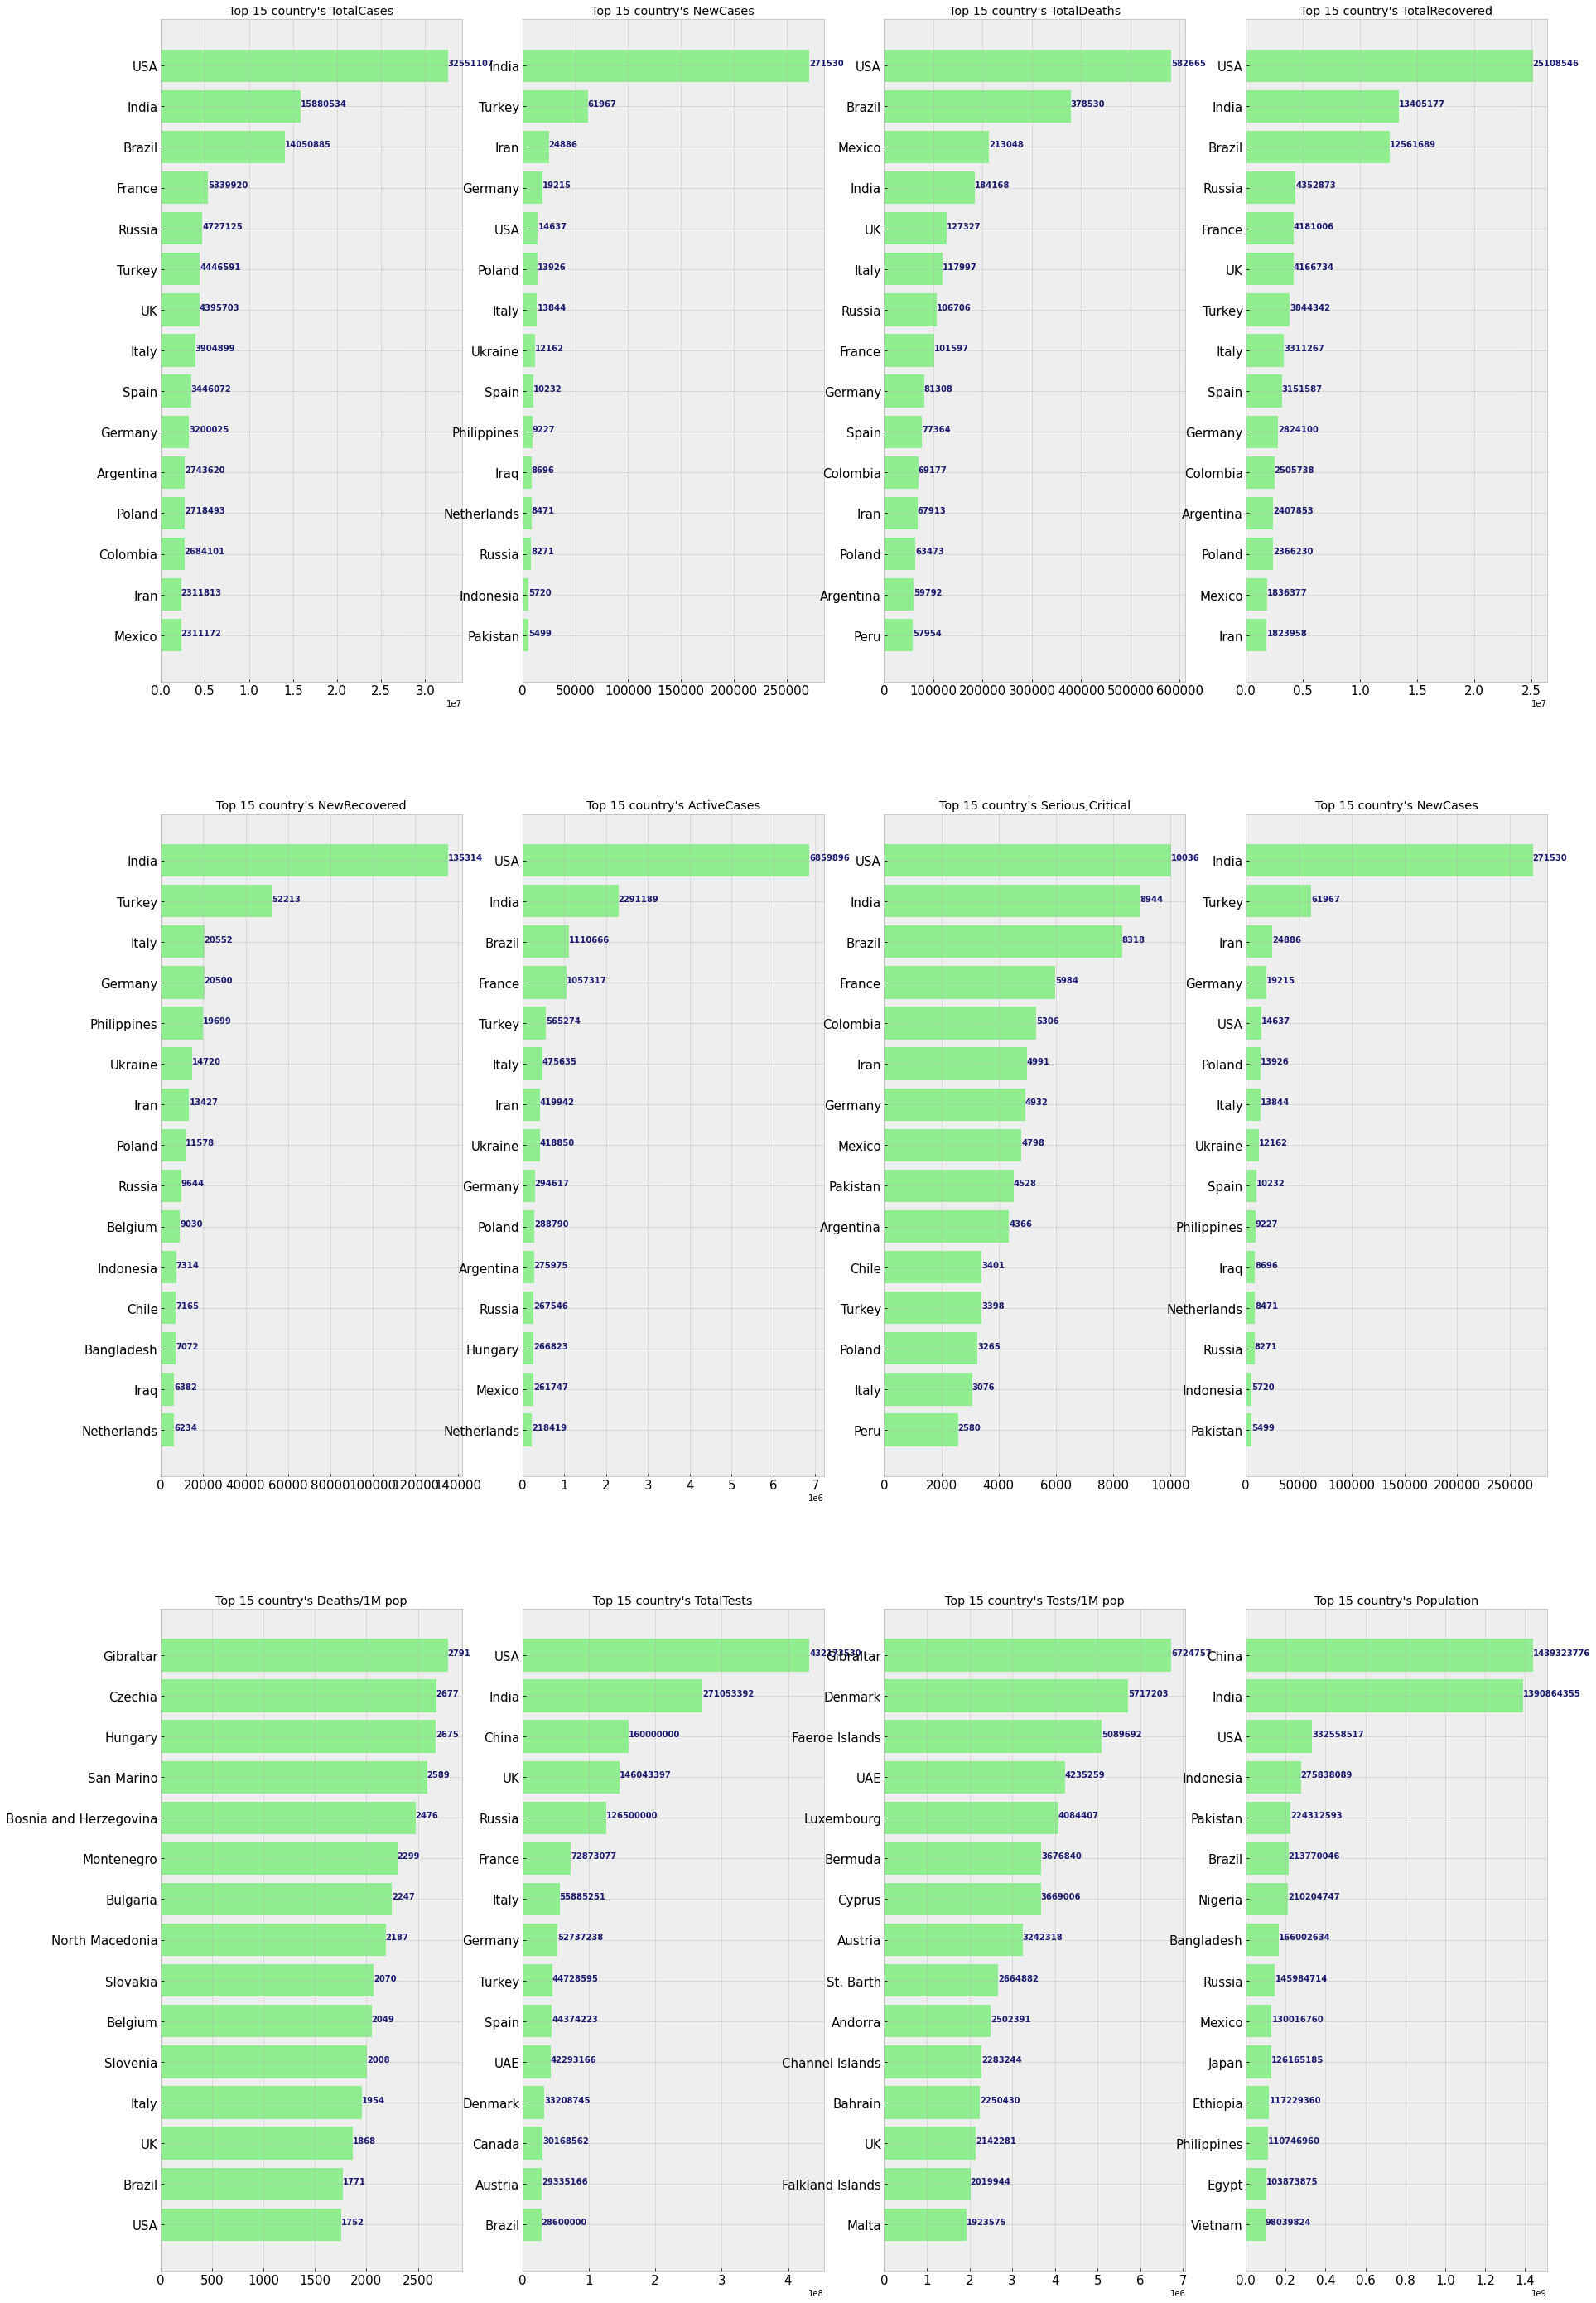

In [101]:
def get_top_15_of_feature(df, feature, ax, num_top=15):
    data = df[feature].sort_values(ascending=False)[0:num_top][::-1]
    ax.barh(y=df['Country,Other'].iloc[data.index], width=data, color='lightgreen')
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_title("Top 15 country's " + feature)
    for i, v in enumerate(data):
        ax.text(v + 0.25, i, str(round(v,2)), color='midNightBlue', fontweight='bold')


fig, ax = plt.subplots(3,4, figsize=(30,50))
features = ['TotalCases', 'NewCases', 'TotalDeaths', 'TotalRecovered', 
            'NewRecovered', 'ActiveCases', 'Serious,Critical', 'NewCases', 
            'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'Population']
index = 0
for i in range(3):
    for j in range(4):
        get_top_15_of_feature(df, feature=features[index], ax=ax[i][j])
        index += 1

In [99]:
df.columns

Index(['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop',
       'Population', 'Continent'],
      dtype='object')

# 4. MỐI QUAN HỆ TRONG DỮ LIỆU

## Sử dụng Heatmap để biểu thị tương quan giữa các thuộc tính

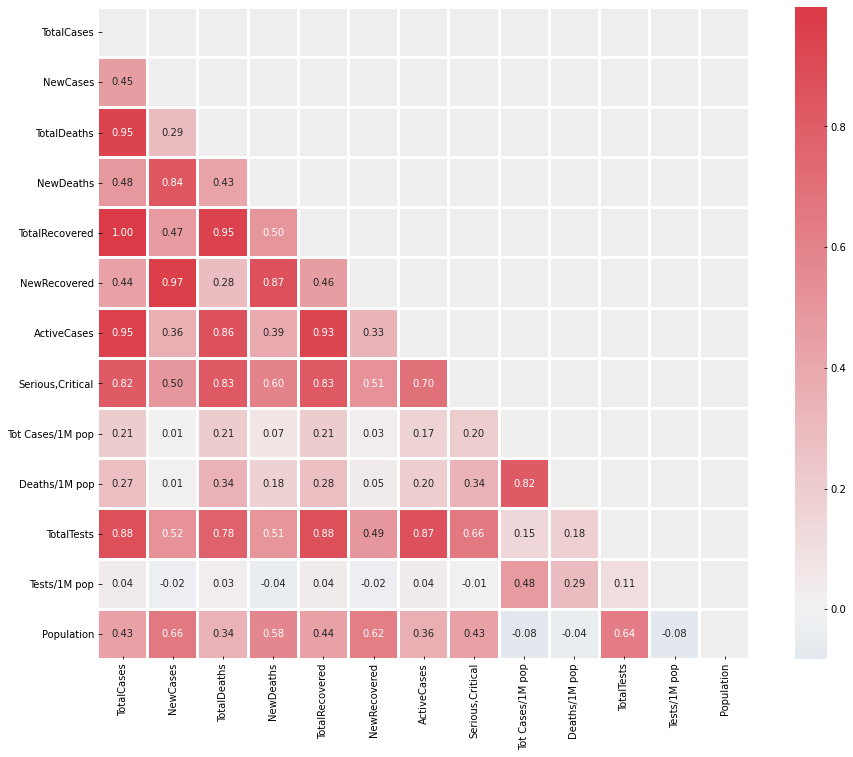

In [83]:
features = df.columns.drop(['Country,Other', 'Continent'])
mask = np.zeros_like(df[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# [df['Severity'] == 4]

plt.figure(figsize=(16,12))
sns.heatmap(df[features].corr(), cmap=sns.diverging_palette(240, 10, as_cmap=True), square=True, 
            annot=True, fmt='.2f', center=0, linewidth=2, cbar=True , mask = mask)

plt.show()

### **GIẢI THÍCH: Hệ số tương quan giữa X, Y  ở đây được tính như sau:
$$ p(X,Y) = \frac{E[(X - \mu_x)(Y - \mu_y)]}{\sigma_x\sigma_y} $$

Giá trị của ρ nằm giữa -1 và +1.
Các giá trị gần +1 cho biết sự hiện diện của mối quan hệ dương mạnh mẽ giữa X và Y, trong khi những giá trị gần -1 cho thấy mối quan hệ âm mạnh mẽ giữa X và Y.
Giá trị gần bằng 0 có nghĩa là không có bất kỳ mối quan hệ nào giữa X và Y.

### Ta lọc ra các cặp thuộc tính có mức độ tương qua lớn hơn 0.8 (có màu đỏ ở đồ thị phía trên)

In [85]:
list_pair = dict()
corr_df = df[features].corr()
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        colname_1 = features[i]
        colname_2 = features[j]
        corr = corr_df[colname_1][colname_2]
        if corr > 0.8:
            list_pair[(colname_1, colname_2)] =  corr
list_pair=sorted(list_pair.items(), key=lambda x: x[1])
print("Top các cặp thuộc tính có mối tương quan cao(Sắp xếp tăng dần)")
list_pair

Top các cặp thuộc tính có mối tương quan cao(Sắp xếp tăng dần)


[(('TotalCases', 'Serious,Critical'), 0.8160173734793086),
 (('Tot\xa0Cases/1M pop', 'Deaths/1M pop'), 0.8186982448810672),
 (('TotalRecovered', 'Serious,Critical'), 0.8304092296886083),
 (('TotalDeaths', 'Serious,Critical'), 0.8329726315240134),
 (('NewCases', 'NewDeaths'), 0.8441923214261656),
 (('TotalDeaths', 'ActiveCases'), 0.8644300714207769),
 (('NewDeaths', 'NewRecovered'), 0.8663169315542717),
 (('ActiveCases', 'TotalTests'), 0.8696661915730348),
 (('TotalRecovered', 'TotalTests'), 0.876623387157993),
 (('TotalCases', 'TotalTests'), 0.8833766180466909),
 (('TotalRecovered', 'ActiveCases'), 0.93198983214725),
 (('TotalCases', 'TotalDeaths'), 0.9453127557970611),
 (('TotalDeaths', 'TotalRecovered'), 0.94916637809481),
 (('TotalCases', 'ActiveCases'), 0.9538050785868635),
 (('NewCases', 'NewRecovered'), 0.9724278158859612),
 (('TotalCases', 'TotalRecovered'), 0.9978140953867439)]

## Với kết quả ở phía trên ta sẽ đi phân tích xem từng cặp

Ta thấy cặp thuộc tính `TotalCases, TotalRecovered` có tỉ lệ tương là 99.8%, khá cao nhưng cũng khá hợp lí. Bởi vì số ca nhiễm càng cao thì số ca hồi phục cũng sẽ cao, ở các cặp thuộc tính ở phía trên, ta thấy rằng giá trị TotalCases sẽ kéo theo các thuộc tính khác như: `TotalRecovered, ActiveCases, TotalDeaths, TotalTests, Serious_Critical`

Bây giờ ta thử dùng biểu đồ đường để xem giữa thuộc tính TotalCases và các thuộc tính liên quan của nó ảnh hưởng với nhau theo tỉ lệ nào (thuận hay ngược)

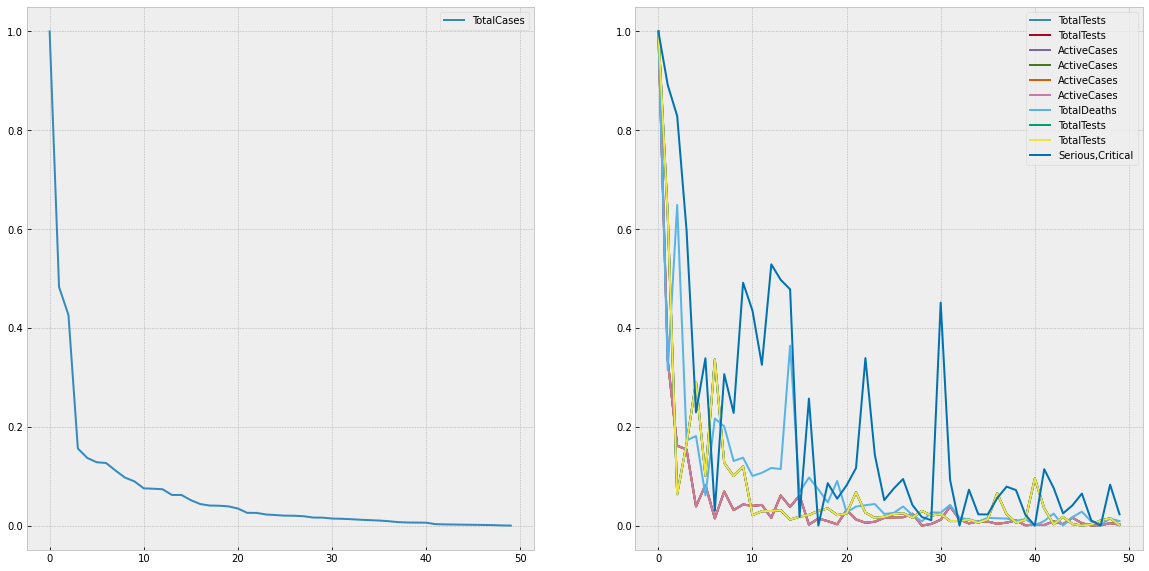

In [86]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
columns = ['TotalCases', 'TotalTests', 'ActiveCases', 'ActiveCases', 'TotalDeaths', 'TotalTests', 'Serious,Critical']
data = df[columns].iloc[0:50]
data_scale = data - data.min()
data_scale /= data_scale.max()
data = pd.concat([df['Country,Other'], data_scale],axis=1)
ax[0].plot(data['TotalCases'], label='TotalCases')
for column in columns[1:]:
    ax[1].plot(data[column], label=column)

ax[0].legend()
ax[1].legend()
plt.show()

### Để ý thấy rằng có 2 thuộc tính có sự phân phối lệch so với `TotalCases`, đó là: `TotalTests` và `Serious_Critical`. Ta thử tìm hiểu xem

### * So sánh `TotalCases` và `TotalTests`

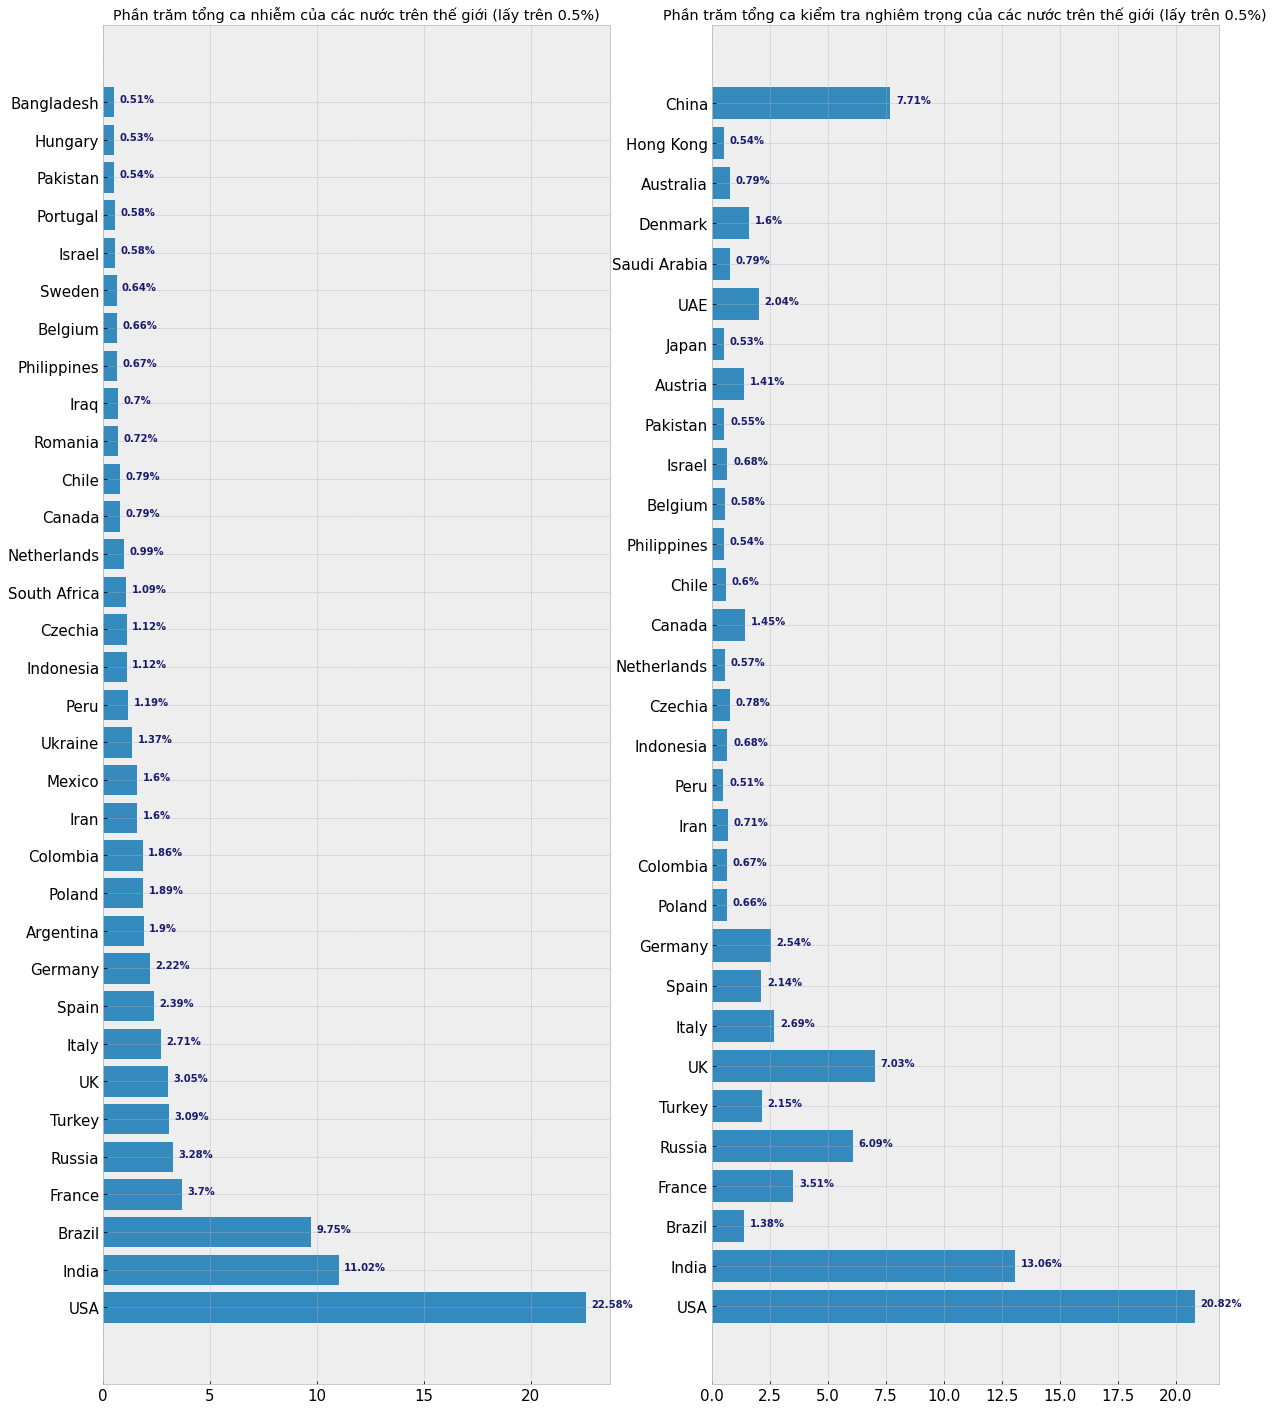

In [87]:
fig, ax = plt.subplots(1,2, figsize=(20,25))

def plot_ratio_barh(df, colname, ax, min_sup, title):
    data = df[colname]/df[colname].sum()*100
    data = data[data > min_sup]
    ax.barh(y=df['Country,Other'].iloc[data.index], width=data)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_title(title)
    for i, v in enumerate(data):
        ax.text(v + 0.25, i, str(round(v,2)) + '%', color='midNightBlue', fontweight='bold')

        
title='Phần trăm tổng ca nhiễm của các nước trên thế giới (lấy trên 0.5%)'
plot_ratio_barh(df, 'TotalCases', ax[0], min_sup=0.5, title=title)

title='Phần trăm tổng ca kiểm tra nghiêm trọng của các nước trên thế giới (lấy trên 0.5%)'
plot_ratio_barh(df, 'TotalTests', ax[1], min_sup=0.5, title=title)

### => Có một số nước kiểm tra nhiều nhưng lại có số ca nhiễm lại ít, chứng tỏ rằng một số nước kiểm tra y tế rất tích cực hoặc là số liệu gian lận. Ta thấy 2 kết quả trên lệch nhất là ở 2 nước `China` và `Brazil`, ta thử xem số liệu của 2 nước này xem 

In [88]:
df[(df['Country,Other'] == 'Brazil') | (df['Country,Other'] == 'China')]

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
2,Brazil,14050885,0,378530,0,12561689,0,1110666,8318,65729,1771,28600000,133789,213770046,South America
212,China,90541,21,4636,0,85600,27,305,6,63,3,160000000,111163,1439323776,Asia


### * So sánh `TotalCases` và `Serious_Critical`

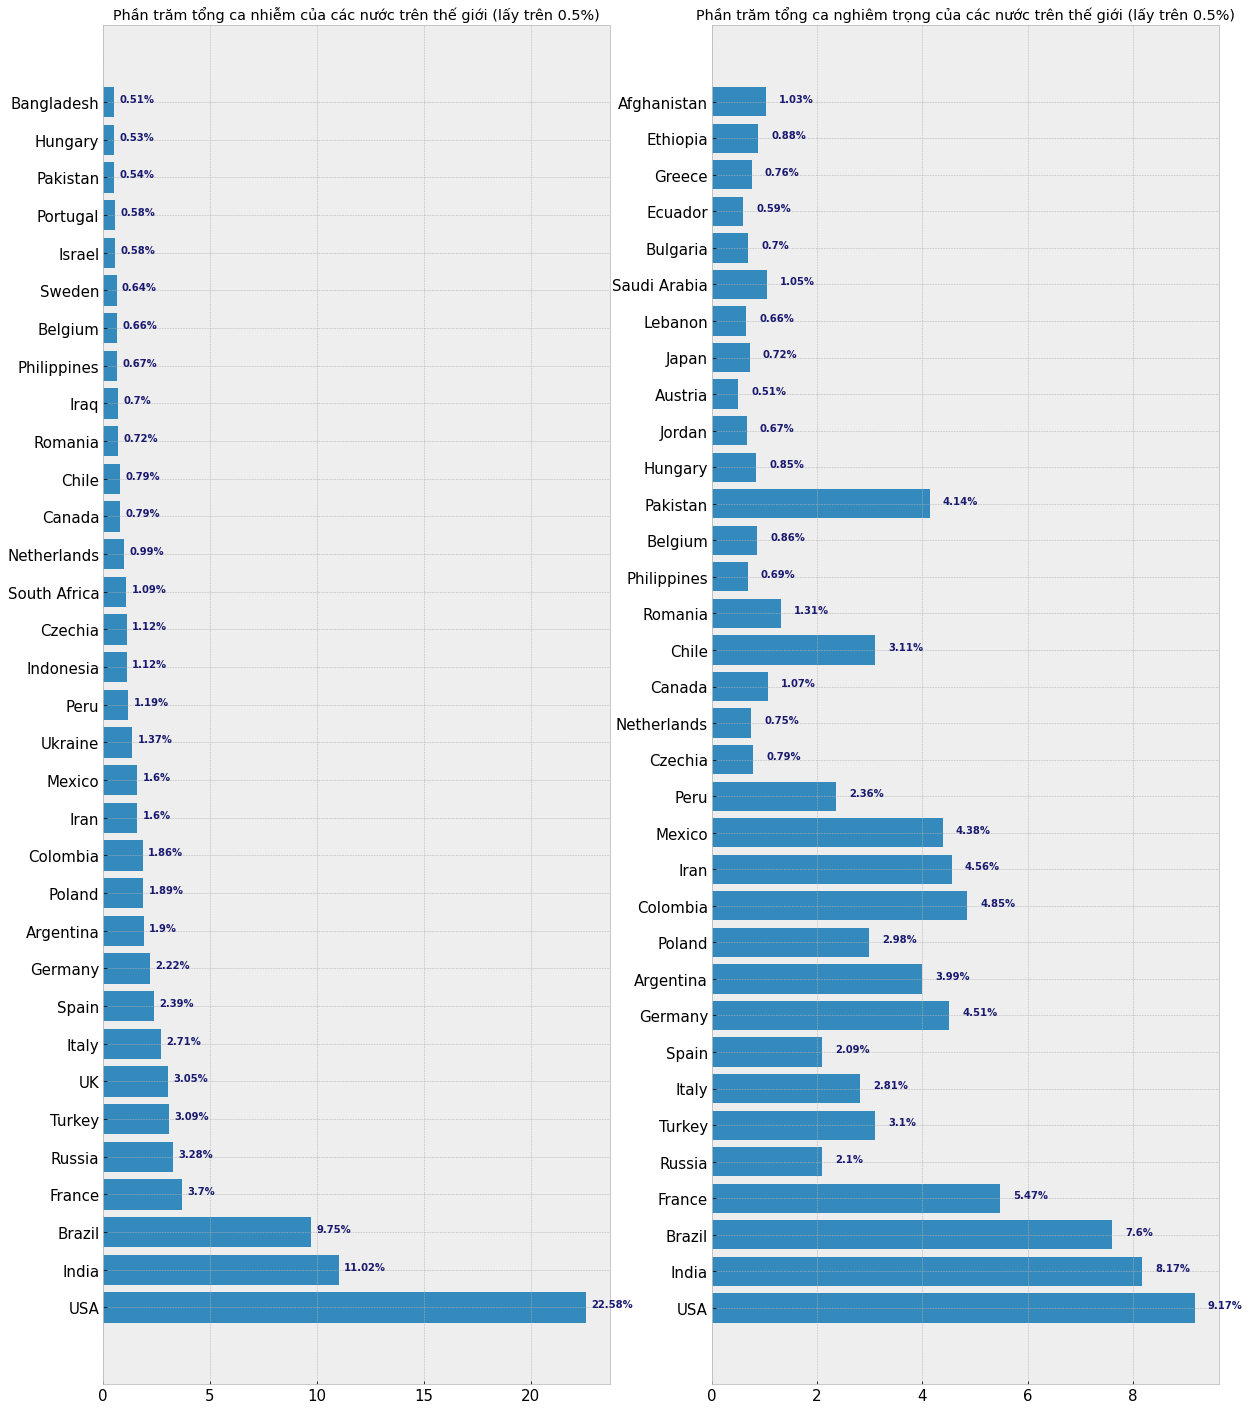

In [89]:
fig, ax = plt.subplots(1,2, figsize=(20,25))

def plot_ratio_barh(df, colname, ax, min_sup, title):
    data = df[colname]/df[colname].sum()*100
    data = data[data > min_sup]
    ax.barh(y=df['Country,Other'].iloc[data.index], width=data)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_title(title)
    for i, v in enumerate(data):
        ax.text(v + 0.25, i, str(round(v,2)) + '%', color='midNightBlue', fontweight='bold')

        
title='Phần trăm tổng ca nhiễm của các nước trên thế giới (lấy trên 0.5%)'
plot_ratio_barh(df, 'TotalCases', ax[0], min_sup=0.5, title=title)

title='Phần trăm tổng ca nghiêm trọng của các nước trên thế giới (lấy trên 0.5%)'
plot_ratio_barh(df, 'Serious,Critical', ax[1], min_sup=0.5, title=title)

### => Nhìn chung số ca nghiêm trọng có lẽ không phụ thuộc lắm vào số lượng ca nhiễm. 

## Thử xét một số cặp thuộc tính có độ tương quan cao nhất

In [90]:
list_pair

[(('TotalCases', 'Serious,Critical'), 0.8160173734793086),
 (('Tot\xa0Cases/1M pop', 'Deaths/1M pop'), 0.8186982448810672),
 (('TotalRecovered', 'Serious,Critical'), 0.8304092296886083),
 (('TotalDeaths', 'Serious,Critical'), 0.8329726315240134),
 (('NewCases', 'NewDeaths'), 0.8441923214261656),
 (('TotalDeaths', 'ActiveCases'), 0.8644300714207769),
 (('NewDeaths', 'NewRecovered'), 0.8663169315542717),
 (('ActiveCases', 'TotalTests'), 0.8696661915730348),
 (('TotalRecovered', 'TotalTests'), 0.876623387157993),
 (('TotalCases', 'TotalTests'), 0.8833766180466909),
 (('TotalRecovered', 'ActiveCases'), 0.93198983214725),
 (('TotalCases', 'TotalDeaths'), 0.9453127557970611),
 (('TotalDeaths', 'TotalRecovered'), 0.94916637809481),
 (('TotalCases', 'ActiveCases'), 0.9538050785868635),
 (('NewCases', 'NewRecovered'), 0.9724278158859612),
 (('TotalCases', 'TotalRecovered'), 0.9978140953867439)]

### 1. Xét cặp có độ tương quan cao nhất ` TotalCases` và `TotalRecovered `

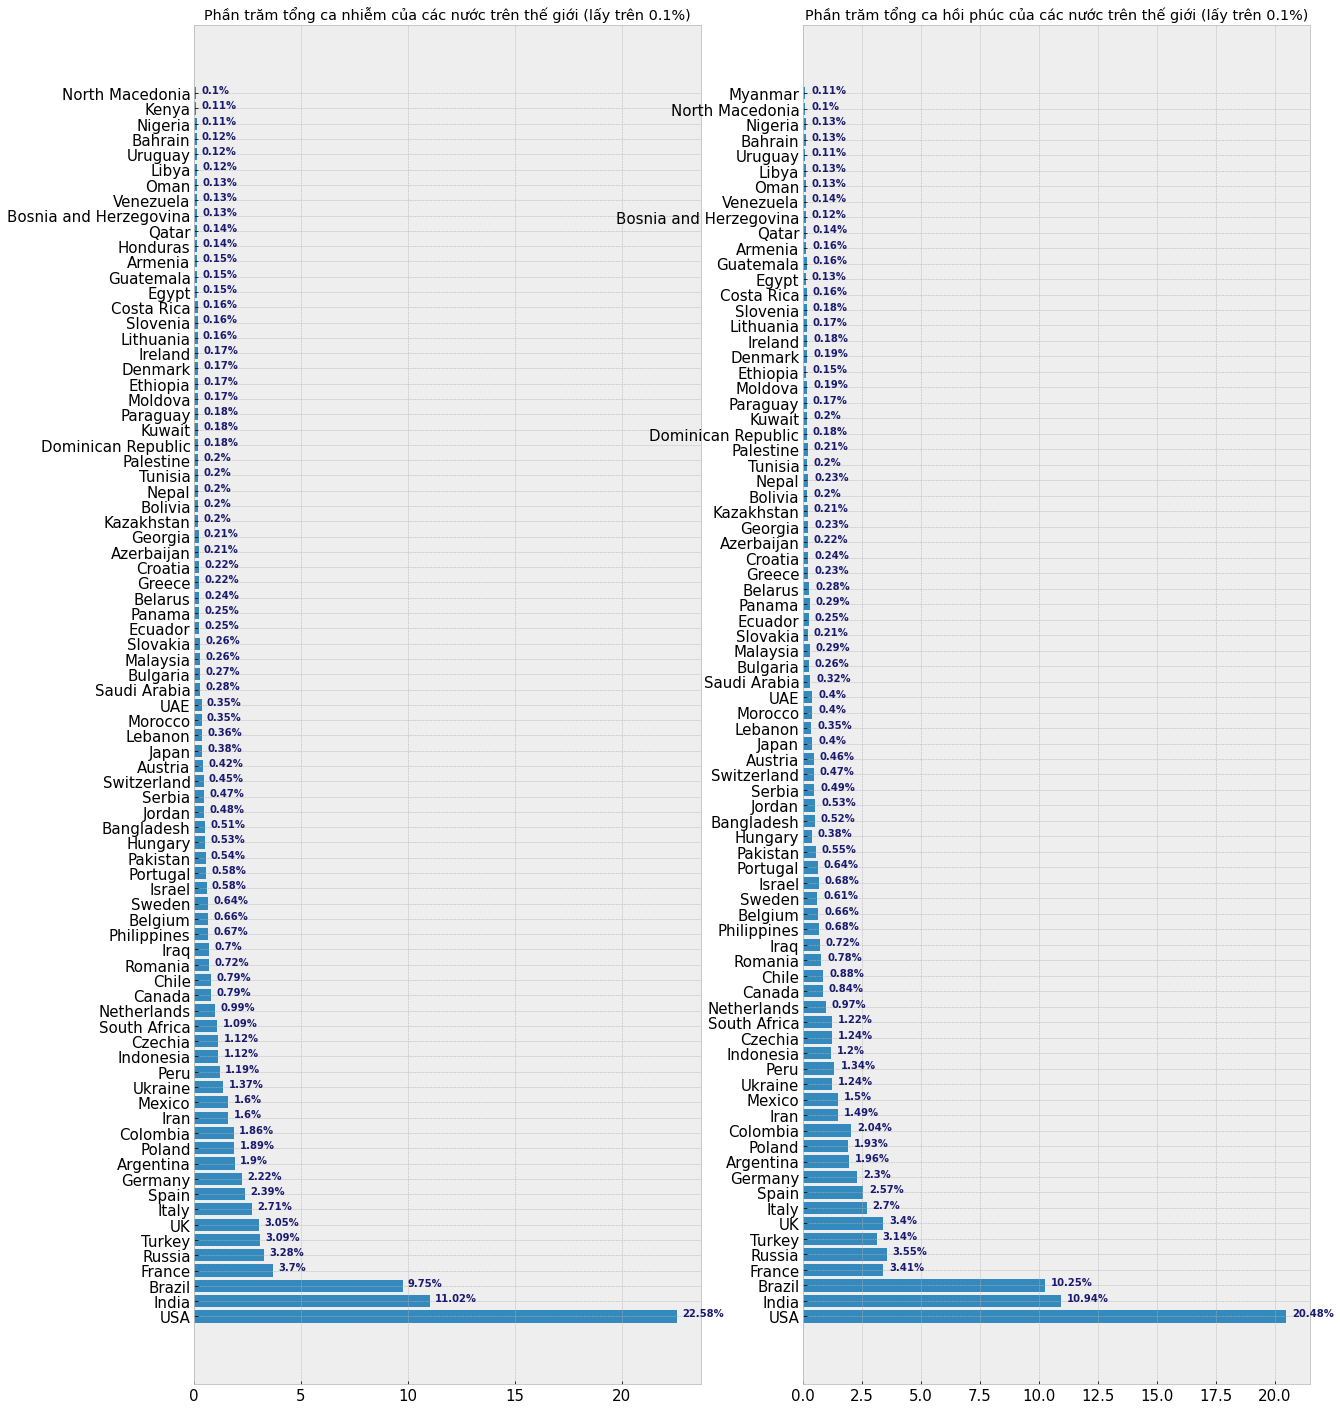

In [91]:
fig, ax = plt.subplots(1,2, figsize=(20,25))

def plot_ratio_barh(df, colname, ax, min_sup, title):
    data = df[colname]/df[colname].sum()*100
    data = data[data > min_sup]
    ax.barh(y=df['Country,Other'].iloc[data.index], width=data)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_title(title)
    for i, v in enumerate(data):
        ax.text(v + 0.25, i, str(round(v,2)) + '%', color='midNightBlue', fontweight='bold')

        
title='Phần trăm tổng ca nhiễm của các nước trên thế giới (lấy trên 0.1%)'
plot_ratio_barh(df, 'TotalCases', ax[0], min_sup=0.1, title=title)

title='Phần trăm tổng ca hồi phúc của các nước trên thế giới (lấy trên 0.1%)'
plot_ratio_barh(df, 'TotalRecovered', ax[1], min_sup=0.1, title=title)

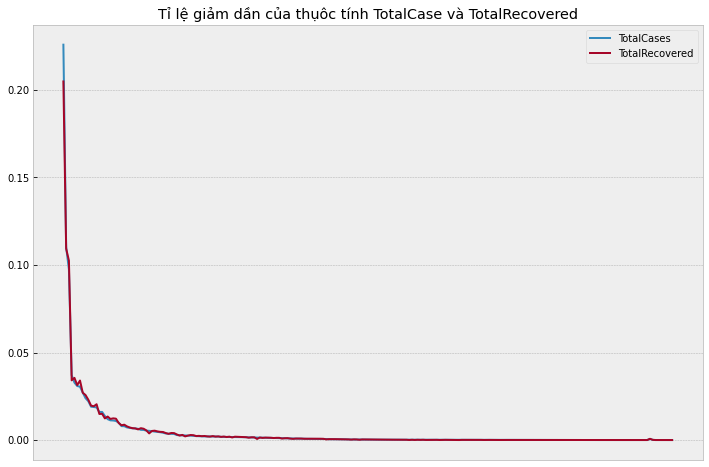

In [92]:
plt.figure(figsize=(12,8))
plt.plot(df['TotalCases']/df['TotalCases'].sum(), label='TotalCases')
plt.plot(df['TotalRecovered']/df['TotalRecovered'].sum(), label='TotalRecovered')
plt.legend()
plt.title('Tỉ lệ giảm dần của thụôc tính TotalCase và TotalRecovered')
plt.xticks([])
plt.show()

### => Dữ liệu rất đẹp, chứng tỏ hai thuộc tính có mối quan hệ kéo theo chặt chẽ, tức là số lượng ca nhiễm càng nhiều thì số lượng ca hồi phục cũng nhiều tương ứng. Điều này cho ta thấy rằng bệnh nhiễm virus này có một chu kì nhiễm nhất định ( tức là cứ sau một thời gian nhất định nào đó thì người bệnh sẽ hồi phục)

## Tiếp theo ta thử trực quan hóa xem 4 cặp có độ tương quan cao nhất tiếp theo xem thế nào

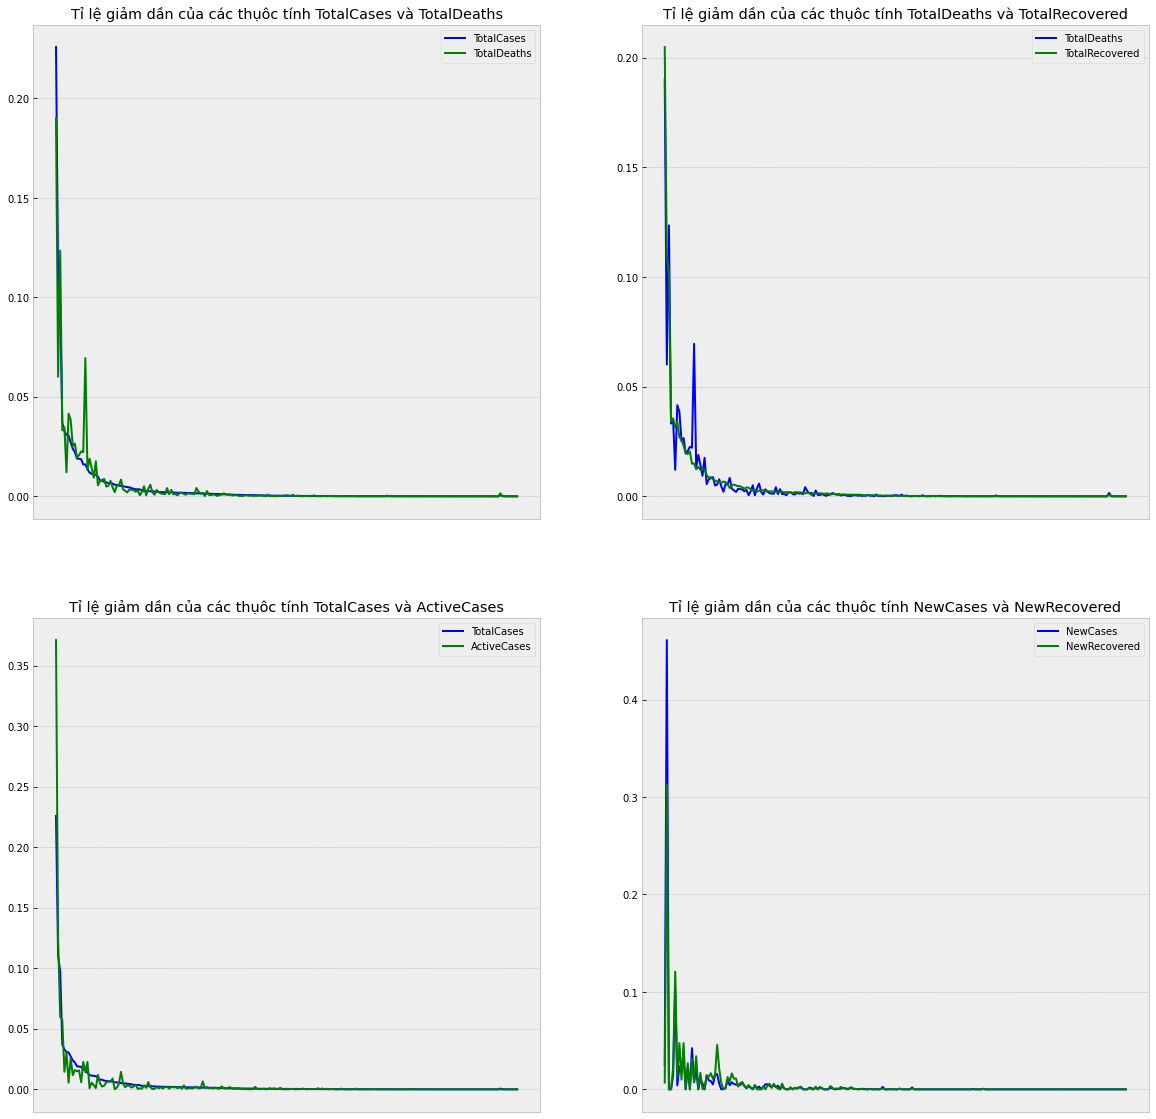

In [102]:
# Lấy danh sách 4 thuộc tính có tương quan cao nhất (bỏ đi cặp thuộc tính cao nhất đã làm ở trên)
top_4_pair = list_pair[-5:-1]

data = df[["TotalCases", "TotalDeaths", 'TotalRecovered', 'ActiveCases', 'NewCases', 'NewRecovered']].copy()
data_scale = data - data.min()
data_scale /= data_scale.max()

index = 0
fig, axes = plt.subplots(2,2, figsize=(20,20))
for i in range(2):
    for j in range(2):
        feature_1 = top_4_pair[index][0][0]
        feature_2 = top_4_pair[index][0][1]
        axes[i][j].plot(data_scale[feature_1]/data_scale[feature_1].sum(), label=feature_1, color='blue')
        axes[i][j].plot(data_scale[feature_2]/data_scale[feature_2].sum(), label=feature_2, color='green')
        index += 1
        axes[i][j].legend()
        axes[i][j].set_title('Tỉ lệ giảm dần của các thụôc tính {} và {}'.format(feature_1, feature_2))
        axes[i][j].set_xticks([])
plt.show()

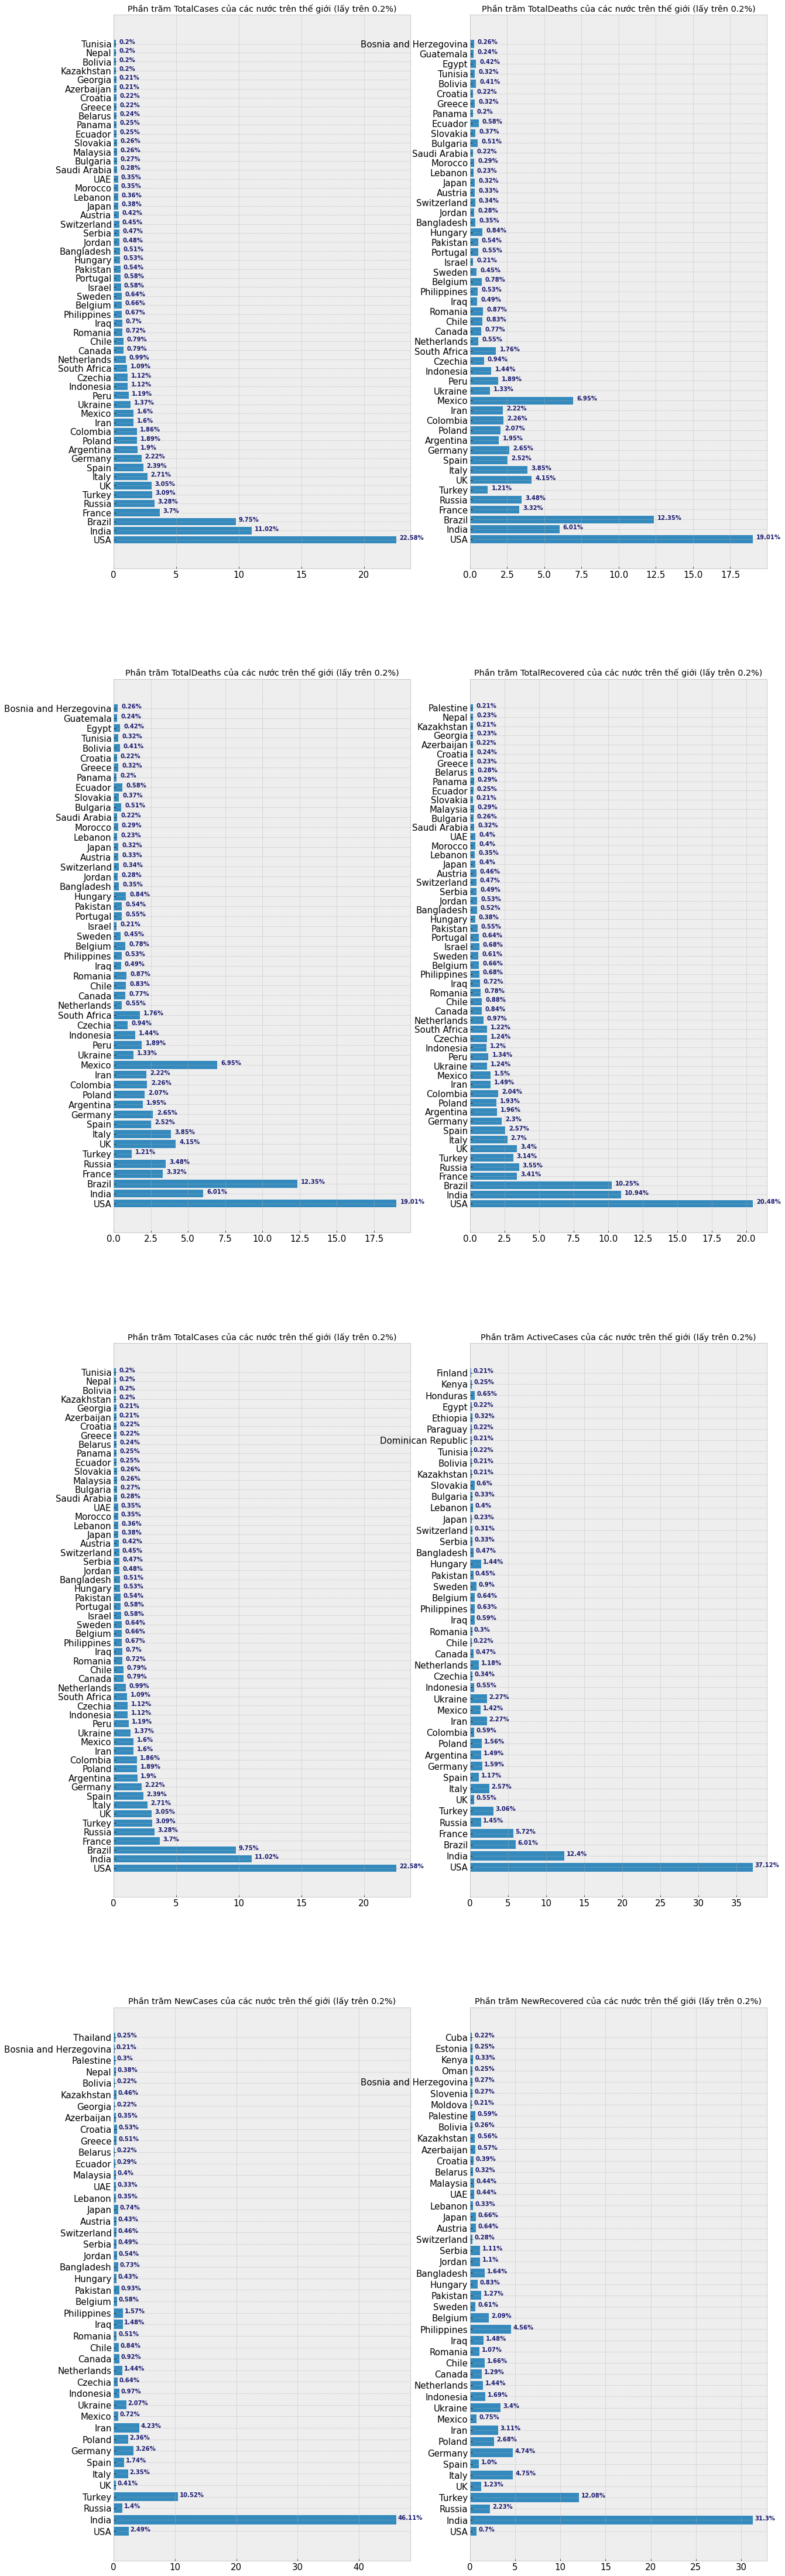

In [103]:
fig, axes = plt.subplots(4,2, figsize=(20,80))
for _ in range(4):        
    feature_1 = top_4_pair[_][0][0]
    feature_2 = top_4_pair[_][0][1]
    title='Phần trăm ' + feature_1 + ' của các nước trên thế giới (lấy trên 0.2%)'
    plot_ratio_barh(df, feature_1, axes[_][0], min_sup=0.2, title=title)
    title='Phần trăm ' + feature_2 + ' của các nước trên thế giới (lấy trên 0.2%)'
    plot_ratio_barh(df, feature_2, axes[_][1], min_sup=0.2, title=title)

## Tiếp theo ta thử phân tích đến từng lục địa quốc gia xem thế nào

### Vẽ biểu đồ cho một thuộc tính ( thuộc tính Continents).
- Dùng biểu đồ countplot để  đếm số lượng các vùng ( Continents) ở thuộc tính Continent. 
- Hàm countplot của thư viện seaborn sẽ đếm số lượng các quan sát trong thuộc tính và vẽ biểu đồ.

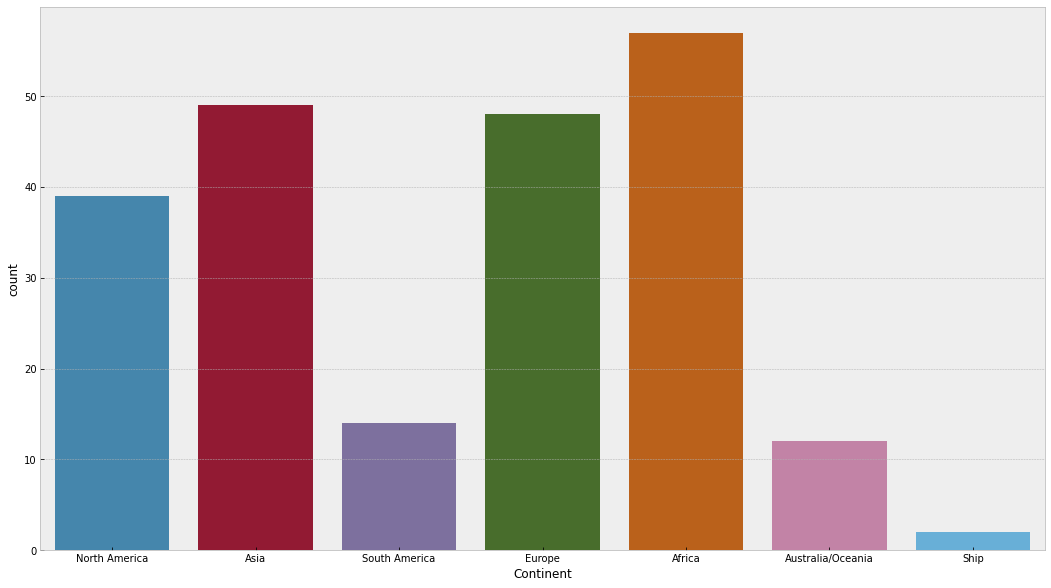

In [110]:
plt.figure(figsize=(18,10))
ax = sns.countplot(data = df, x ='Continent')
plt.show()

### Biểu đồ thể hiện mối quan hệ giữa các thuộc tính TotalCases, TotalDeaths, NewCases, NewDeaths ở từng khu vực (Continents ). Từ đó có thể rút ra các nhận xét cần thiết cho việc phân tích dữ liệu và dự đoán.

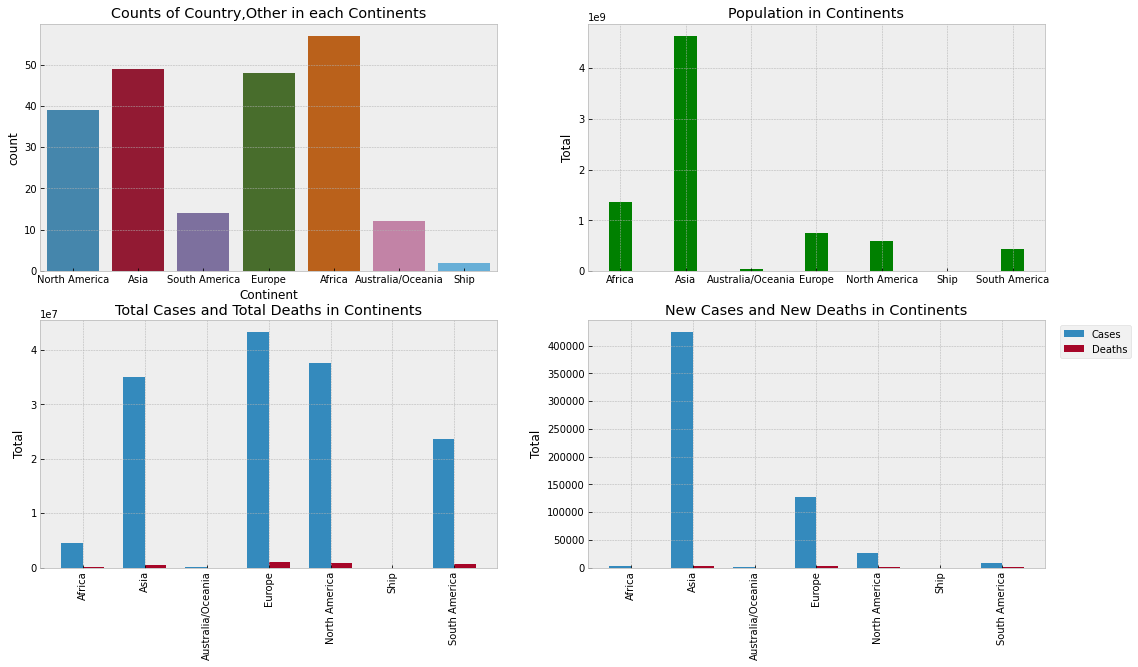

In [115]:
fig, ax = plt.subplots(2,2,figsize = (18,10))

# Tổng số các country,other của từng khu vực( Continents)
sns.countplot(data = df, x ='Continent', ax = ax[0][0])
ax[0][0].set_title('Counts of Country,Other in each Continents')



width = 0.35

# Tổng dân số của từng khu vực( Continents)
ttsum_continent_pop = df.groupby(['Continent'])['Population'].sum()

labels = ttsum_continent_pop.index
x = np.arange(len(labels))


ax[0][1].bar(x, ttsum_continent_pop.values,width,label = 'Pop', color = 'g')
ax[0][1].set_xticklabels(labels)
ax[0][1].set_ylabel('Total')
ax[0][1].set_title('Population in Continents')
ax[0][1].set_xticks(x)


# Tổng số ca nhiễm và tử vong của từng khu vực( Continents)
ttsum_continent_cases = df.groupby(['Continent'])['TotalCases'].sum()
ttsum_continent_deaths = df.groupby(['Continent'])['TotalDeaths'].sum()

ax[1][0].bar(x - width/2, ttsum_continent_cases.values,width,label = 'Cases')
ax[1][0].bar(x + width/2, ttsum_continent_deaths.values,width, label = 'Deaths')
ax[1][0].set_xticklabels(labels, rotation = 90)
ax[1][0].set_ylabel('Total')
ax[1][0].set_title('Total Cases and Total Deaths in Continents')
ax[1][0].set_xticks(x)


#Số ca nhiễm và tử vong của từng khu vực( Continent) trong ngày 22/4/2021 c9 
nwsum_continent_cases = df.groupby(['Continent'])['NewCases'].sum()
nwsum_continent_deaths = df.groupby(['Continent'])['NewDeaths'].sum()

ax[1][1].bar(x - width/2, nwsum_continent_cases.values,width,label = 'Cases')
ax[1][1].bar(x + width/2, nwsum_continent_deaths.values,width, label = 'Deaths')
ax[1][1].set_xticklabels(labels, rotation = 90)
ax[1][1].set_ylabel('Total')
ax[1][1].set_title('New Cases and New Deaths in Continents')
ax[1][1].set_xticks(x)

plt.legend(bbox_to_anchor = (1.2,1))
plt.show()

<Figure size 1440x1440 with 0 Axes>

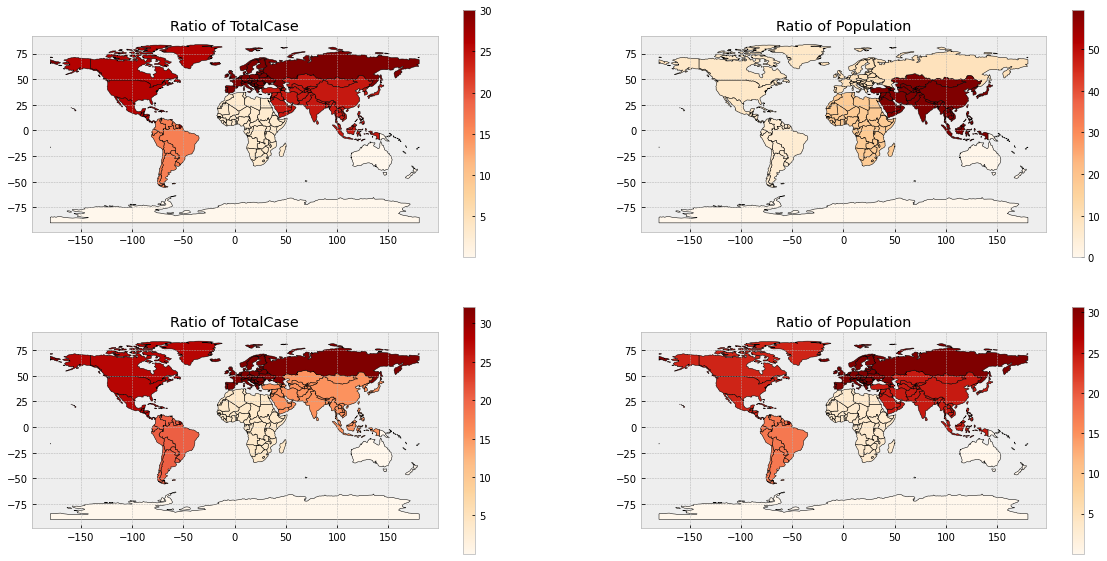

In [128]:
plt.figure(figsize=(20,20))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.replace({'Oceania': 'Australia/Oceania', 'Antarctica': 'Ship', 'Seven seas (open ocean)': 'Ship'})

def PlotMapContinentByFeature(df, world, feature, title, ax):
    def getValue(x):
        x = x.select_dtypes(exclude='object')
        return x.sum() / df[feature].sum()*100 
    data = df.groupby('Continent').apply(getValue)[feature]
    
    world[feature] = world['continent'].apply(lambda x: data[x])
    world.plot(feature, legend=True, figsize=(10,8),  cmap='OrRd', edgecolor='k', ax=ax);
    ax.set_title(title)

fig, axes = plt.subplots(2,2, figsize=(20,10))
PlotMapContinentByFeature(df, world, feature='TotalCases', ax=axes[0][0], title='Ratio of TotalCase')
PlotMapContinentByFeature(df, world, feature='Population', ax=axes[0][1], title='Ratio of Population')
PlotMapContinentByFeature(df, world, feature='TotalDeaths', ax=axes[1][0], title='Ratio of TotalCase')
PlotMapContinentByFeature(df, world, feature='TotalRecovered', ax=axes[1][1], title='Ratio of Population')


#### Nhận xét:
- Vào ngày 22/4/2021 số ca mắc ở Asia( châu Á) là cao nhất.
- Asia( châu Á) là châu lục có dân số cao nhất thế giới, tuy nhiên tổng số ca nhiễm và tổng số ca tử vong lại thấp hơn Europe( châu Âu) và American ( châu Mĩ).

### Tiếp theo, ta kiếm tra tỉ lệ của các ca "mới" (mới nhiễm, mới hồi phục, mới chết) so với các ca nhiễm hiện tại (Active Cases)

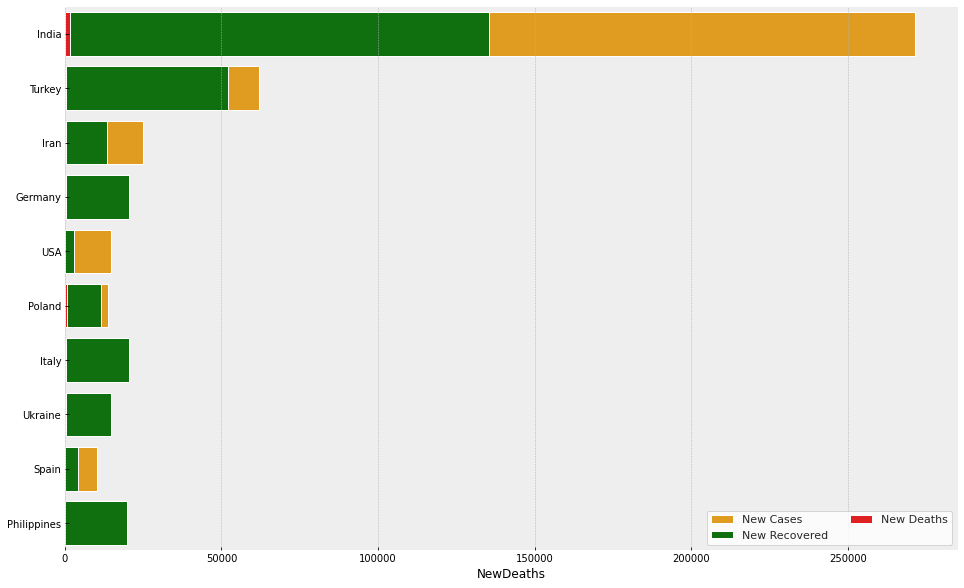

In [131]:
top_10_df = df.sort_values(by=['NewCases'], ascending=False).iloc[0:10]
ratio_df = pd.DataFrame([])
ratio_df = top_10_df.iloc[:, [0, 7, 2, 4, 6]]
ratio_df['ratio_new']=top_10_df['NewCases']/top_10_df['ActiveCases']*100
ratio_df['ratio_new_recovered']=top_10_df['NewRecovered']/top_10_df['ActiveCases']*100
ratio_df['ratio_new_death']=top_10_df['NewDeaths']/top_10_df['ActiveCases']*100
f, ax = plt.subplots(figsize=(16, 10))
sns.set_theme(style="whitegrid")

sns.barplot(x="NewCases", y="Country,Other", data=ratio_df,
            label="New Cases", color="orange")

sns.barplot(x="NewRecovered", y="Country,Other", data=ratio_df,
            label="New Recovered", color="green")

sns.barplot(x="NewDeaths", y="Country,Other", data=ratio_df,
            label="New Deaths", color="red")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="")
sns.despine(left=True, bottom=True)

### Qua biểu đồ có thể thấy tỉ lệ hồi phục của đa số nước ở top 10 số lượng ca nhiễm mới đều cao trong khi tỉ lệ chết lại rất thấp (<1%). Chứng tỏ việc điều trị dịch bệnh hiện nay đã có sự kiểm soát, không quá khó trong việc điều trị nhưng việc phòng dịch để tránh lây nhiễm lại chưa tốt ở một vài nước.